# 2.2 - The Multilayer Perceptron

In [ ]:
!wget -nc --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/2021.deeplearning/main/content/init.py
import init; init.init(force_download=False); 

## Classifying Fashion-MNIST

You will have to create a classification model for the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist) dataset, a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network.

In [1]:
import os
import gzip
import numpy as np
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')
import tensorflow as tf

In [2]:
print(tf.__version__)

2.19.0


In [3]:
from tensorflow.keras import datasets
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()
X_train = x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
X_test = x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])

In [4]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


Let's see a random sample

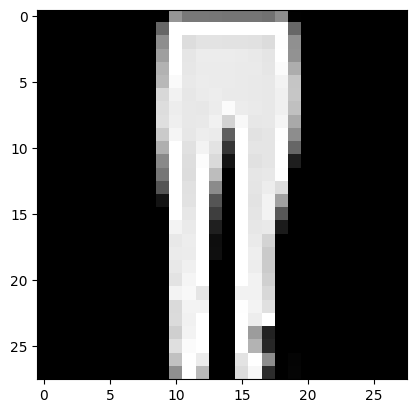

In [5]:
ind = np.random.permutation(X_train.shape[0])
plt.imshow(x_train[ind[0],:,:], cmap='gray');

Preparing the data for a training process...

In [6]:
from keras import utils 
from sklearn.preprocessing import StandardScaler

input_dim = X_train.shape[1]

scaler = StandardScaler()
X_trainN = scaler.fit_transform(X_train)
X_testN = scaler.transform(X_test)

# convert list of labels to binary class matrix
y_trainOHE = utils.to_categorical(y_train)
nb_classes = y_trainOHE.shape[1]

## Define the network architecture using keras

### Sequential models

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

model = Sequential([
    Dense(32, input_shape=(input_dim,)),
    Activation('tanh'),
    Dense(nb_classes),
    Activation('softmax'),
])

or

In [8]:
del model
model = Sequential()
model.add(Dense(64, input_dim=input_dim))
model.add(Activation('tanh'))
model.add(Dense(32))
model.add(Activation('tanh'))
model.add(Dense(nb_classes, activation='softmax'))

**Assignment**: Take a look to the core layers in keras: https://keras.io/layers/core/ and the set of basic parameters https://keras.io/layers/about-keras-layers/

In [9]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,650 (205.66 KB)

 Trainable params: 52,650 (205.66 KB)

 Non-trainable params: 0 (0.00 B)

Once the arquictecture of model has been defined, the next step is to set the loss function and optimizer

In [11]:
# pass optimizer by name: default parameters will be used
model.compile(loss='categorical_crossentropy', optimizer='sgd')

from keras import optimizers
# or instantiate an optimizer before passing it to model.compile
sgd = optimizers.SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd)

Remember the definition of cross entropy:

$$\mathcal{L}({\bf{\hat{y}}},{\bf{y}}) = -\frac{1}{N}\sum_{i=1}^N y_i\log(\hat{y}_i) + (1-y_i)\log(1-\hat{y}_i)$$

The categorical cross entropy can be defined as:

$$\mathcal{L}({\bf{\hat{y}}},{\bf{y}}) = -\frac{1}{N}\sum_{i=1}^N \sum_{j=1}^C {\bf{1}}_{y_i \in C_j} \log p_{model}[y_i \in C_j]$$

The term ${\bf{1}}_{y_i \in C_j}$ is the indicator function of the $i$-th observation belonging to the $j$-th category. The $p_{model}[y_i \in C_j]$ is the probability predicted by the model for the $i$-th observation to belong to the $j$-th category. When there are more than two categories, the neural network outputs a vector of $C$ probabilities, each giving the probability that the network input should be classified as belonging to the respective category. When the number of categories is just two, the neural network outputs a single probability $\hat{y}_i$, with the other one being $1$ minus the output. This is why the binary cross entropy looks a bit different from categorical cross entropy, despite being a special case of it. 

**Note**. If insteat of a multi-class problem we would be facing a multi-label classification problem, the activation function of the last layer must be a **sigmoid** and the loss function **binary_crossentropy**.

Take a look to compile and fit parameters https://keras.io/models/model/#compile

In [12]:
print("Training...")
model.train_on_batch(X_trainN, y_trainOHE)

print("Generating test predictions...")
preds = model.predict(X_testN[0,:].reshape(1,input_dim), verbose=0)

Training...
Generating test predictions...


real class
9


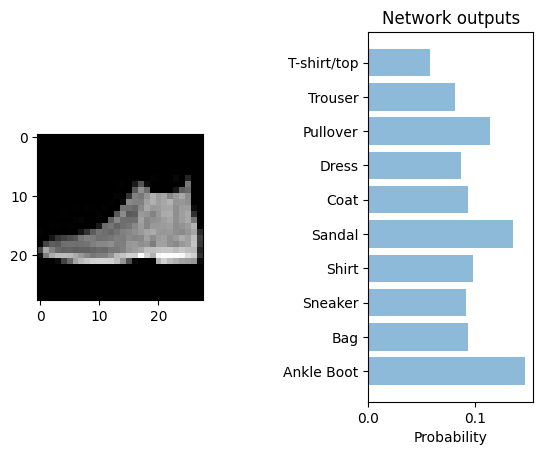

In [13]:
print('real class')
print(y_test[0])

objects = ('Ankle Boot', 'Bag', 'Sneaker', 'Shirt', 'Sandal', 'Coat', 'Dress', 'Pullover', 'Trouser', 'T-shirt/top')
y_pos = np.arange(nb_classes)
performance = preds.flatten()
plt.subplot(121)
plt.imshow(X_test[0,:].reshape(28,28), cmap='gray');
plt.subplot(122) 
plt.barh(y_pos[::-1], performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Probability')
plt.title('Network outputs')
plt.subplots_adjust(wspace = 1)
plt.show()

In [14]:
print("Training...")
model.fit(X_trainN, y_trainOHE, epochs=10, batch_size=16, validation_split=0.1, verbose=2)

Training...
Epoch 1/10
3375/3375 - 1s - 347us/step - loss: 0.4599 - val_loss: 0.3945
Epoch 2/10
3375/3375 - 1s - 320us/step - loss: 0.3654 - val_loss: 0.3668
Epoch 3/10
3375/3375 - 1s - 319us/step - loss: 0.3370 - val_loss: 0.3685
Epoch 4/10
3375/3375 - 1s - 319us/step - loss: 0.3155 - val_loss: 0.3524
Epoch 5/10
3375/3375 - 1s - 321us/step - loss: 0.2979 - val_loss: 0.3431
Epoch 6/10
3375/3375 - 1s - 315us/step - loss: 0.2858 - val_loss: 0.3429
Epoch 7/10
3375/3375 - 1s - 318us/step - loss: 0.2779 - val_loss: 0.3519
Epoch 8/10
3375/3375 - 1s - 315us/step - loss: 0.2680 - val_loss: 0.3444
Epoch 9/10
3375/3375 - 1s - 318us/step - loss: 0.2599 - val_loss: 0.3603
Epoch 10/10
3375/3375 - 1s - 318us/step - loss: 0.2522 - val_loss: 0.3617


Generating test predictions...


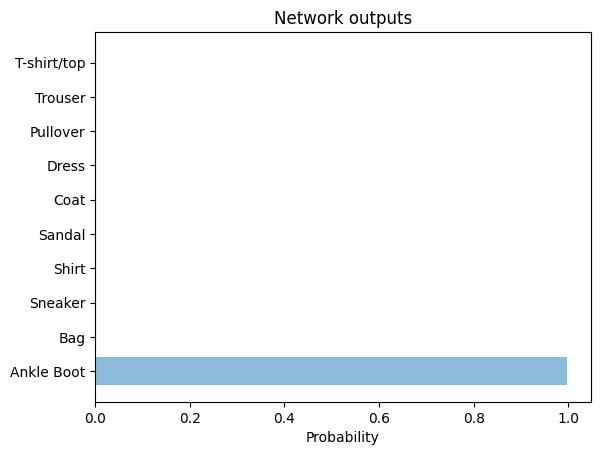

In [15]:
print("Generating test predictions...")
preds = model.predict(X_testN[0,:].reshape(1,input_dim), verbose=0)
performance = preds.flatten()
 
plt.barh(y_pos[::-1], performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Probability')
plt.title('Network outputs')
 
plt.show()

In [16]:
preds = np.argmax(model.predict(X_testN), axis=-1)
Accuracy = np.mean(preds == y_test)
print('Accuracy = ', Accuracy*100, '%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 233us/step
Accuracy =  86.48 %


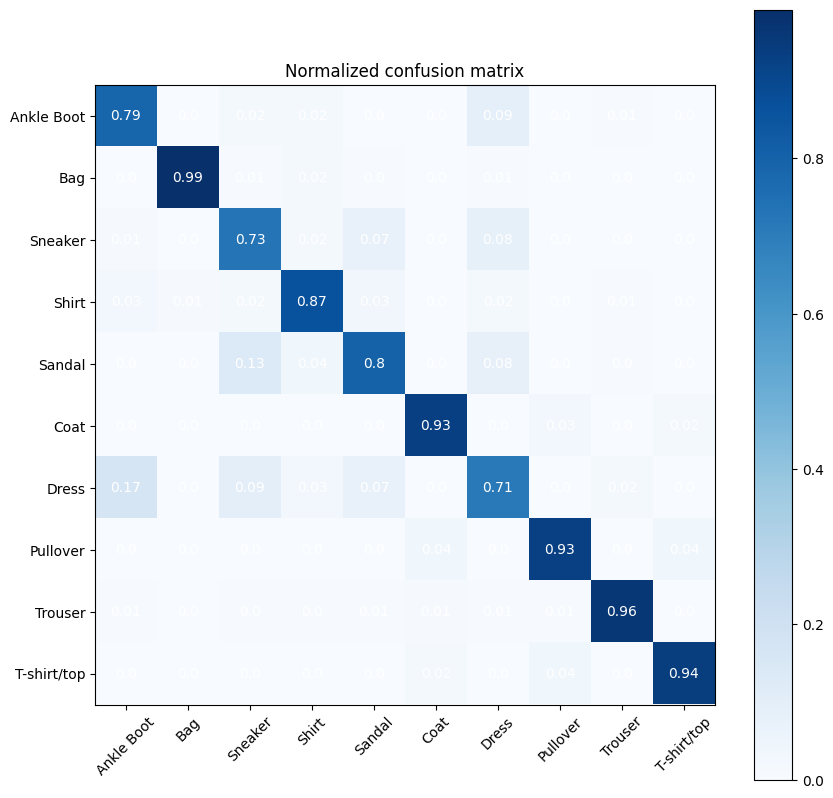

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, preds)
cm = cm/np.sum(cm,axis=0)
cmap = plt.cm.Blues
tick_marks = np.arange(nb_classes)
fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        text = ax.text(j, i, np.around(cm[i, j],decimals=2),
                       ha="center", va="center", color="w")
plt.title('Normalized confusion matrix')
fig.colorbar(im)
plt.xticks(tick_marks, objects, rotation=45)
plt.yticks(tick_marks, objects);

### Functional models

The Keras functional API provides a more flexible way for defining models.

It allows you to define multiple input or output models as well as models that share layers. More than that, it allows you to define ad hoc acyclic network graphs.

Models are defined by creating instances of layers and connecting them directly to each other in pairs, then defining a Model that specifies the layers to act as the input and output to the model.

In [28]:
from keras.layers import Input, Dense, Dropout
from keras.models import Model


# This returns a tensor
inputs = Input(shape=(784,))

# a layer instance is callable on a tensor, and returns a tensor
x = Dense(64, activation='tanh')(inputs)
x = Dense(32, activation='tanh')(x)
predictions = Dense(nb_classes, activation='softmax')(x)

# This creates a model that includes
# the Input layer and three Dense layers
model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,650 (205.66 KB)

 Trainable params: 52,650 (205.66 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.fit(X_trainN, y_trainOHE, epochs=10, batch_size=16, validation_split=0.1, verbose=2)

Epoch 1/10
3375/3375 - 1s - 377us/step - accuracy: 0.8170 - loss: 0.5504 - val_accuracy: 0.8517 - val_loss: 0.4180
Epoch 2/10
3375/3375 - 1s - 321us/step - accuracy: 0.8645 - loss: 0.3876 - val_accuracy: 0.8625 - val_loss: 0.3830
Epoch 3/10
3375/3375 - 1s - 321us/step - accuracy: 0.8770 - loss: 0.3481 - val_accuracy: 0.8663 - val_loss: 0.3651
Epoch 4/10
3375/3375 - 1s - 320us/step - accuracy: 0.8861 - loss: 0.3219 - val_accuracy: 0.8715 - val_loss: 0.3553
Epoch 5/10
3375/3375 - 1s - 324us/step - accuracy: 0.8919 - loss: 0.3036 - val_accuracy: 0.8728 - val_loss: 0.3472
Epoch 6/10
3375/3375 - 1s - 326us/step - accuracy: 0.8981 - loss: 0.2872 - val_accuracy: 0.8730 - val_loss: 0.3442
Epoch 7/10
3375/3375 - 1s - 319us/step - accuracy: 0.9028 - loss: 0.2732 - val_accuracy: 0.8753 - val_loss: 0.3360
Epoch 8/10
3375/3375 - 1s - 319us/step - accuracy: 0.9071 - loss: 0.2601 - val_accuracy: 0.8750 - val_loss: 0.3447
Epoch 9/10
3375/3375 - 1s - 319us/step - accuracy: 0.9115 - loss: 0.2484 - val_a

In [22]:
preds = np.argmax(model.predict(X_testN), axis=-1)
Accuracy = np.mean(preds == y_test)
print('Accuracy = ', Accuracy*100, '%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 250us/step
Accuracy =  87.14 %


**Note**. Take a look to the keras functional API available on https://keras.io/getting-started/functional-api-guide/

### Defining a model by subclassing the Model class
In this way we use inherintance from class Model to define the nwe model. It requires two methods the constructor init, where you should define your layers, and the forward pass in call.

In [27]:
class MyModel(Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.dense1 = Dense(64, activation=tf.nn.tanh)
        self.dense2 = Dense(32, activation=tf.nn.tanh)
        self.dense3 = Dense(nb_classes, activation=tf.nn.softmax)
        
    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        return self.dense3(x)

model = MyModel()

In [29]:
class MyModel2(Model):
    def __init__(self):
        super(MyModel2, self).__init__()
        self.dense1 = Dense(64, activation=tf.nn.tanh)
        self.dense2 = Dense(32, activation=tf.nn.tanh)
        self.dense3 = Dense(nb_classes, activation=tf.nn.softmax)
        self.dropout = Dropout(0.5)
        
    def call(self, inputs, training=False):
        x = self.dense1(inputs)
        x = self.dense2(x)
        if training:
            x = self.dropout(x, training=training)
        return self.dense3(x)

model2 = MyModel2()

In [30]:
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [31]:
model.fit(X_trainN, y_trainOHE, epochs=10, batch_size=16, validation_split=0.1, verbose=2)

Epoch 1/10
3375/3375 - 1s - 356us/step - accuracy: 0.8147 - loss: 0.5562 - val_accuracy: 0.8520 - val_loss: 0.4209
Epoch 2/10
3375/3375 - 1s - 318us/step - accuracy: 0.8620 - loss: 0.3916 - val_accuracy: 0.8668 - val_loss: 0.3799
Epoch 3/10
3375/3375 - 1s - 337us/step - accuracy: 0.8772 - loss: 0.3509 - val_accuracy: 0.8715 - val_loss: 0.3659
Epoch 4/10
3375/3375 - 1s - 320us/step - accuracy: 0.8857 - loss: 0.3250 - val_accuracy: 0.8763 - val_loss: 0.3503
Epoch 5/10
3375/3375 - 1s - 319us/step - accuracy: 0.8921 - loss: 0.3044 - val_accuracy: 0.8772 - val_loss: 0.3499
Epoch 6/10
3375/3375 - 1s - 319us/step - accuracy: 0.8991 - loss: 0.2877 - val_accuracy: 0.8755 - val_loss: 0.3393
Epoch 7/10
3375/3375 - 1s - 332us/step - accuracy: 0.9034 - loss: 0.2744 - val_accuracy: 0.8762 - val_loss: 0.3365
Epoch 8/10
3375/3375 - 1s - 336us/step - accuracy: 0.9072 - loss: 0.2612 - val_accuracy: 0.8783 - val_loss: 0.3364
Epoch 9/10
3375/3375 - 1s - 334us/step - accuracy: 0.9110 - loss: 0.2495 - val_a